# Crime data from

http://www.houstontx.gov/police/cs/crime-stats-archives.htm

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data directory

In [3]:
year = '2013'

In [4]:
# data folder path
data_directory = os.path.join('..','data','crime_data/{}'.format(year))
data_directory_saves = os.path.join( '..','data','clean_data/')
premise_dataset = os.path.join('..','data','crime_data/premise_codes.csv')

# combine all fines into one

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.xls")) 
df_from_each_file = (pd.read_excel(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 11 columns):
# Of Offenses    130459 non-null int64
Beat             130459 non-null object
Block Range      130459 non-null object
Date             130459 non-null datetime64[ns]
Hour             130459 non-null int64
Offense Type     130459 non-null object
Premise          130459 non-null object
Street Name      130459 non-null object
Suffix           130459 non-null object
Type             130459 non-null object
Unnamed: 1       0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 10.9+ MB


In [7]:
df.head(2)

,# Of Offenses,Beat,Block Range,Date,Hour,Offense Type,Premise,Street Name,Suffix,Type,Unnamed: 1
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR,-,DR,NaN
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT,W,ST,NaN


## Check for missing values

In [8]:
df.apply(lambda x: sum(x.isnull()))

# Of Offenses         0
Beat                  0
Block Range           0
Date                  0
Hour                  0
Offense Type          0
Premise               0
Street Name           0
Suffix                0
Type                  0
Unnamed: 1       130459
dtype: int64

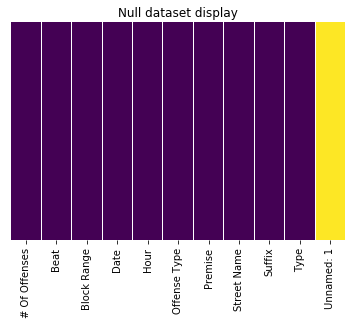

In [9]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()


## Cleanup
- lowercase column names
- joining similar columns
- renaming

In [10]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [11]:
df.head()

,# of offenses,beat,block range,date,hour,offense type,premise,street name,suffix,type,unnamed: 1
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR,-,DR,NaN
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT,W,ST,NaN
2,1,20G10,9900-9999,2013-04-02,16,Murder,20A,RICHMOND,-,AVE,NaN
3,1,2A20,1300-1399,2013-04-19,22,Murder,13R,29TH,E,ST,NaN
4,1,1A10,500-599,2013-04-23,0,Murder,190,RUSK,-,-,NaN


In [12]:
df.rename(columns={
    '# of offenses': 'num_offenses',
     'offense type': 'offense_type',
    'block range': 'block_range',
    'street name': 'street_name'
}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130459 entries, 0 to 130458
Data columns (total 11 columns):
num_offenses    130459 non-null int64
beat            130459 non-null object
block_range     130459 non-null object
date            130459 non-null datetime64[ns]
hour            130459 non-null int64
offense_type    130459 non-null object
premise         130459 non-null object
street_name     130459 non-null object
suffix          130459 non-null object
type            130459 non-null object
unnamed: 1      0 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 10.9+ MB


In [13]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name,suffix,type,unnamed: 1
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR,-,DR,NaN
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT,W,ST,NaN
2,1,20G10,9900-9999,2013-04-02,16,Murder,20A,RICHMOND,-,AVE,NaN
3,1,2A20,1300-1399,2013-04-19,22,Murder,13R,29TH,E,ST,NaN
4,1,1A10,500-599,2013-04-23,0,Murder,190,RUSK,-,-,NaN


## Drop columns

In [14]:
df.drop(['suffix','type','unnamed: 1'],axis=1, inplace=True)

In [15]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT
2,1,20G10,9900-9999,2013-04-02,16,Murder,20A,RICHMOND
3,1,2A20,1300-1399,2013-04-19,22,Murder,13R,29TH
4,1,1A10,500-599,2013-04-23,0,Murder,190,RUSK


## Premise

In [16]:
premise_data = pd.read_csv(premise_dataset)
#premise_data.columns = map(str.lower, premise_data.columns)
premise_data.columns = ['premise','premise_description']
premise_data.head()

,premise,premise_description
0,01A,AIRPORT TERMINAL
1,01B,BUS STATION
2,01K,RAILROAD TRACK/RIGHT OF WAY
3,01P,PARK & RIDE TERMINAL
4,01R,LIGHT RAIL VEHICLE


In [17]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name
0,1,19G10,9400-9499,2013-04-25,5,Murder,13R,WOODFAIR
1,1,17E40,6100-6199,2013-04-14,0,Murder,18A,BELLFORT
2,1,20G10,9900-9999,2013-04-02,16,Murder,20A,RICHMOND
3,1,2A20,1300-1399,2013-04-19,22,Murder,13R,29TH
4,1,1A10,500-599,2013-04-23,0,Murder,190,RUSK


In [18]:
df = pd.merge(df, premise_data, on='premise', how='outer')

In [19]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,premise,street_name,premise_description
0,1.0,19G10,9400-9499,2013-04-25,5.0,Murder,13R,WOODFAIR,ROAD/STREET/SIDEWALK
1,1.0,2A20,1300-1399,2013-04-19,22.0,Murder,13R,29TH,ROAD/STREET/SIDEWALK
2,1.0,14D20,4000-4099,2013-04-18,21.0,Murder,13R,REDBUD,ROAD/STREET/SIDEWALK
3,1.0,2A60,1900-1999,2013-04-20,20.0,Rape,13R,ELLA,ROAD/STREET/SIDEWALK
4,1.0,2A50,4200-4299,2013-04-06,4.0,Rape,13R,KOEHLER,ROAD/STREET/SIDEWALK


## Drop premise column

In [20]:
df.drop(['premise'],axis=1, inplace=True)

## Rename premise_description to premise

In [21]:
df.rename(columns={
    'premise_description': 'premise',
}, inplace=True)

In [22]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,street_name,premise
0,1.0,19G10,9400-9499,2013-04-25,5.0,Murder,WOODFAIR,ROAD/STREET/SIDEWALK
1,1.0,2A20,1300-1399,2013-04-19,22.0,Murder,29TH,ROAD/STREET/SIDEWALK
2,1.0,14D20,4000-4099,2013-04-18,21.0,Murder,REDBUD,ROAD/STREET/SIDEWALK
3,1.0,2A60,1900-1999,2013-04-20,20.0,Rape,ELLA,ROAD/STREET/SIDEWALK
4,1.0,2A50,4200-4299,2013-04-06,4.0,Rape,KOEHLER,ROAD/STREET/SIDEWALK


# Null values

In [23]:
df.apply(lambda x: sum(x.isnull()))

num_offenses       2
beat               2
block_range        2
date               2
hour               2
offense_type       2
street_name        2
premise         1103
dtype: int64

In [24]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,num_offenses,beat,block_range,date,hour,offense_type,street_name,premise
130301,1.0,20G30,11800-11899,2013-05-11,14.0,Theft,WESTHEIMER,NaN
130302,1.0,5F30,10100-10199,2013-05-11,8.0,Theft,ALGIERS,NaN
130303,1.0,18F40,2700-2799,2013-10-05,19.0,Theft,DUNVALE,NaN
130304,1.0,13D10,6400-6499,2013-10-23,10.0,Theft,EPPES,NaN
130305,1.0,2A10,4600-4699,2013-10-17,14.0,Theft,IRVINGTON,NaN
130306,1.0,2A40,1700-1799,2013-09-26,11.0,Theft,WEBER,NaN
130307,1.0,5F10,2000-2099,2013-09-13,17.0,Theft,AFTON,NaN
130308,1.0,10H60,3000-3099,2013-09-11,2.0,Theft,ROSEDALE,NaN
130459,NaN,NaN,NaN,NaT,NaN,NaN,NaN,VACANT BANK
130460,NaN,NaN,NaN,NaT,NaN,NaN,NaN,VACANT JAIL/PRISON


### Drop rows with more than 3 null values

In [25]:
df.dropna(thresh=3,inplace=True)

In [26]:
df[df.isnull().any(axis=1)][-10:]  # display last 10

,num_offenses,beat,block_range,date,hour,offense_type,street_name,premise
130299,1.0,5F10,7600-7699,2013-05-23,20.0,Theft,KATY,NaN
130300,1.0,13D40,7500-7599,2013-05-30,10.0,Theft,OREM,NaN
130301,1.0,20G30,11800-11899,2013-05-11,14.0,Theft,WESTHEIMER,NaN
130302,1.0,5F30,10100-10199,2013-05-11,8.0,Theft,ALGIERS,NaN
130303,1.0,18F40,2700-2799,2013-10-05,19.0,Theft,DUNVALE,NaN
130304,1.0,13D10,6400-6499,2013-10-23,10.0,Theft,EPPES,NaN
130305,1.0,2A10,4600-4699,2013-10-17,14.0,Theft,IRVINGTON,NaN
130306,1.0,2A40,1700-1799,2013-09-26,11.0,Theft,WEBER,NaN
130307,1.0,5F10,2000-2099,2013-09-13,17.0,Theft,AFTON,NaN
130308,1.0,10H60,3000-3099,2013-09-11,2.0,Theft,ROSEDALE,NaN


### Replace null values on premise_code to 'none'

In [29]:
df.premise.fillna('UNK',inplace=True)

In [30]:
df.apply(lambda x: sum(x.isnull()))

num_offenses    0
beat            0
block_range     0
date            0
hour            0
offense_type    0
street_name     0
premise         0
dtype: int64

# Inspect each column

## `num_offenses`

In [31]:
df.num_offenses.value_counts(dropna=False)

1.0     129259
2.0        994
3.0        184
4.0         13
6.0          3
7.0          2
5.0          2
11.0         1
8.0          1
Name: num_offenses, dtype: int64

In [32]:
df.num_offenses.dtype

dtype('float64')

### Change the type from float to integer

In [33]:
df.num_offenses = df.num_offenses.astype('int')

In [34]:
df.num_offenses.dtype

dtype('int64')

In [35]:
df.num_offenses.value_counts(dropna=False)

1     129259
2        994
3        184
4         13
6          3
7          2
5          2
11         1
8          1
Name: num_offenses, dtype: int64

## `beat`

In [36]:
len(df.beat.value_counts(dropna='False'))

120

In [37]:
df.beat.unique()

array(['19G10', '2A20', '14D20', '2A60', '2A50', '19G20', '6B40', '8C10',
       '17E30', '16E10', '9C40', '17E20', '7C10', '1A10', '8C40', '14D10',
       '10H40', '10H50', '13D20', '3B10', '10H60', '3B50', '1A20',
       '20G10', '6B60', '17E10', '15E20', '20G30', '16E20', '2A10',
       '18F40', '19G30', '7C30', '20G70', '16E30', '18F50', '17E40',
       '20G40', '6B10', '11H30', '20G20', '14D30', '7C20', '3B40',
       '15E30', '18F30', '10H20', '6B20', '6B30', '11H10', '6B50', '5F20',
       '1A30', '8C20', '2A30', '12D10', '19G50', '19G40', '13D10',
       '10H10', '5F30', '12D70', '20G60', '14D40', '24C30', '5F40',
       '1A40', '16E40', '3B30', '11H20', '8C60', '10H30', '9C30', '9C20',
       '13D40', '8C30', '7C40', '8C50', '10H80', '12D50', '24C10',
       '10H70', '9C10', '18F60', '4F10', '4F20', '11H50', '12D30', '1A50',
       '20G80', '18F10', '7C50', '18F20', '12D20', '20G50', '2A40',
       '24C40', 'UNK', '5F10', '21I50', '15E40', '12D60', '11H40',
       '15E10', '12

In [38]:
df.beat = df.beat.str.strip()

In [39]:
len(df.beat.unique())

120

## `block_range`

In [40]:
len(df.block_range.unique())

249

In [41]:
df.block_range = df.block_range.str.strip()

In [42]:
len(df.block_range.unique())

249

## `date`

In [43]:
df['date'].dtype

dtype('<M8[ns]')

## `hour`

In [44]:
df.hour.value_counts(dropna=False)

18.0    8106
22.0    7601
19.0    7559
12.0    7468
20.0    7426
17.0    7369
21.0    7003
15.0    6641
0.0     6601
16.0    6546
14.0    6317
23.0    5800
13.0    5658
10.0    5431
11.0    5335
8.0     5152
9.0     4766
7.0     4105
1.0     3488
2.0     3128
6.0     2779
3.0     2435
5.0     1905
4.0     1840
Name: hour, dtype: int64

In [45]:
df.hour.dtype

dtype('float64')

## Change dtype 

In [46]:
df.hour = df.hour.astype('int')

In [47]:
df.hour.dtype

dtype('int64')

In [48]:
df.hour.value_counts(dropna=False)

18    8106
22    7601
19    7559
12    7468
20    7426
17    7369
21    7003
15    6641
0     6601
16    6546
14    6317
23    5800
13    5658
10    5431
11    5335
8     5152
9     4766
7     4105
1     3488
2     3128
6     2779
3     2435
5     1905
4     1840
Name: hour, dtype: int64

## `offense_type`

In [49]:
df.offense_type.value_counts(dropna=False)

Theft                 73591
Burglary              23733
Auto Theft            13147
Robbery                9891
Aggravated Assault     9274
Rape                    614
Murder                  209
Name: offense_type, dtype: int64

In [50]:
df.offense_type.unique()

array(['Murder', 'Rape', 'Robbery', 'Aggravated Assault', 'Burglary',
       'Auto Theft', 'Theft'], dtype=object)

## `street_name`

In [51]:
len(df.street_name.value_counts(dropna=False))

7540

In [52]:
df.street_name.value_counts(dropna=False)[:10]

WESTHEIMER    3824
GULF          2035
GESSNER       1925
RICHMOND      1726
NORTH         1679
SOUTHWEST     1337
KATY          1337
MAIN          1337
NORTHWEST     1302
BELLAIRE      1300
Name: street_name, dtype: int64

In [53]:
df.street_name.unique()

array(['WOODFAIR', '29TH', 'REDBUD', ..., 'GREENS CROSSING', 'ALLENSBY',
       'WINGATE'], dtype=object)

In [54]:
df.street_name = df.street_name.str.strip()  # no need

In [55]:
len(df.street_name.value_counts(dropna=False))

7540

## Organiaze columns

In [56]:
df.head()

,num_offenses,beat,block_range,date,hour,offense_type,street_name,premise
0,1,19G10,9400-9499,2013-04-25,5,Murder,WOODFAIR,ROAD/STREET/SIDEWALK
1,1,2A20,1300-1399,2013-04-19,22,Murder,29TH,ROAD/STREET/SIDEWALK
2,1,14D20,4000-4099,2013-04-18,21,Murder,REDBUD,ROAD/STREET/SIDEWALK
3,1,2A60,1900-1999,2013-04-20,20,Rape,ELLA,ROAD/STREET/SIDEWALK
4,1,2A50,4200-4299,2013-04-06,4,Rape,KOEHLER,ROAD/STREET/SIDEWALK


In [57]:
# order that I want
cols = ['date','hour','beat','offense_type','block_range','street_name','premise']

In [58]:
df = df.reindex(columns=cols)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130459 entries, 0 to 130458
Data columns (total 7 columns):
date            130459 non-null datetime64[ns]
hour            130459 non-null int64
beat            130459 non-null object
offense_type    130459 non-null object
block_range     130459 non-null object
street_name     130459 non-null object
premise         130459 non-null object
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 8.0+ MB


In [60]:
df.head()

,date,hour,beat,offense_type,block_range,street_name,premise
0,2013-04-25,5,19G10,Murder,9400-9499,WOODFAIR,ROAD/STREET/SIDEWALK
1,2013-04-19,22,2A20,Murder,1300-1399,29TH,ROAD/STREET/SIDEWALK
2,2013-04-18,21,14D20,Murder,4000-4099,REDBUD,ROAD/STREET/SIDEWALK
3,2013-04-20,20,2A60,Rape,1900-1999,ELLA,ROAD/STREET/SIDEWALK
4,2013-04-06,4,2A50,Rape,4200-4299,KOEHLER,ROAD/STREET/SIDEWALK


## Save clean data

In [61]:
data_directory_saves

'../data/clean_data/'

In [62]:
df.to_csv(data_directory_saves+'crime_2013.csv')